In [201]:
%pip install -r requirements.txt


87157.78s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [202]:
import cv2 
import os 
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation

from keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras


In [203]:
picture_size = 48
images = "./images"


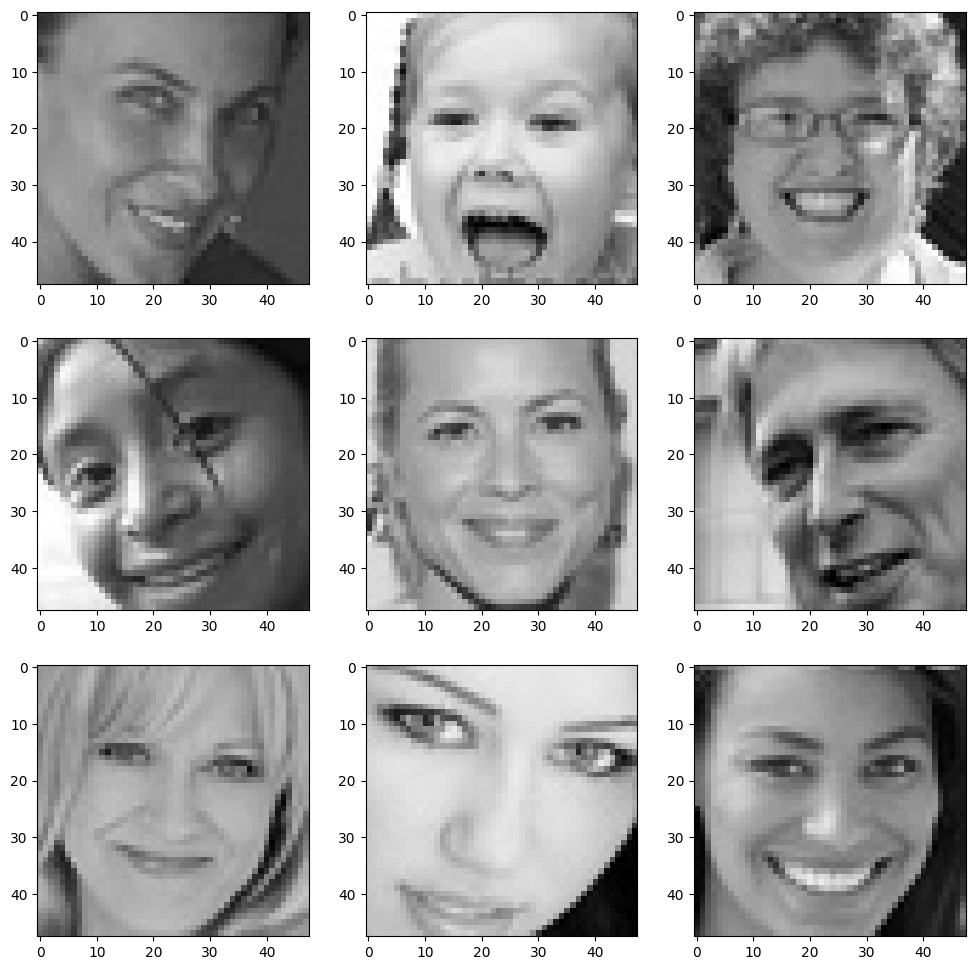

In [204]:
expression = 'happy'
plt.figure(figsize=[12,12])    
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img = cv2.imread(os.path.join(f'./images/train/{expression}',random.choice(os.listdir(f'./images/train/{expression}'))))
    plt.imshow(img)
plt.show()

MAKING TRAINING AND VALIDATION DATA

In [205]:
batch_size = 128

test_set1 = ImageDataGenerator()
train_set1 = ImageDataGenerator()


train_set = keras.utils.image_dataset_from_directory('./images/train',
                                              image_size=(picture_size,picture_size),
                                              batch_size=batch_size,
                                              color_mode='grayscale',
                                              label_mode='categorical',
                                              shuffle=True)
test_set = keras.utils.image_dataset_from_directory('./images/validation',
                                              image_size=(picture_size,picture_size),
                                              batch_size=batch_size,
                                              color_mode='grayscale',
                                              label_mode='categorical',
                                              shuffle=True)
test_set1 =test_set1.flow_from_directory('./images/validation',target_size= (picture_size,picture_size),batch_size= batch_size,color_mode='grayscale',class_mode='categorical',shuffle=True)
train_set1 =train_set1.flow_from_directory('./images/train',target_size= (picture_size,picture_size),batch_size= batch_size,color_mode='grayscale',class_mode='categorical',shuffle=True)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 28821 images belonging to 7 classes.


MODEL BUILDING

In [206]:
from keras.optimizers import RMSprop,Adam,  SGD

from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam

class_no = 7

model = Sequential()
# 1 - Convolution
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(class_no, activation='softmax'))

opt = LegacyAdam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_88 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_88 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_88 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 24, 24, 128)     

In [207]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model_weights.keras", monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, restore_best_weights=True)    

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, verbose=1, min_delta=0.0001)

CALLBACKS = [earlystop, checkpoint, reduce_lr]


EPOCHS = 48

In [208]:
print(test_set.cardinality().numpy())
print(train_set1.n // batch_size)

56
225


In [211]:

num_train_samples = train_set.cardinality().numpy()
num_test_samples = test_set.cardinality().numpy()

steps_per_epoch = train_set1.n // batch_size
validation_steps = test_set1.n // batch_size
train_set = train_set.repeat()
history = model.fit(x=train_set, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, validation_data=test_set, validation_steps=validation_steps , callbacks=callbacks)


Epoch 1/48


225/225 [==============================] - ETA: 0s - loss: 1.9823 - accuracy: 0.2436
Epoch 1: val_accuracy did not improve from 0.62301
225/225 [==============================] - 314s 1s/step - loss: 1.9823 - accuracy: 0.2436 - val_loss: 1.7214 - val_accuracy: 0.3104 - lr: 1.0000e-04
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.8016 - accuracy: 0.3063
Epoch 2: val_accuracy did not improve from 0.62301
225/225 [==============================] - 399s 2s/step - loss: 1.8016 - accuracy: 0.3063 - val_loss: 1.8763 - val_accuracy: 0.3111 - lr: 1.0000e-04
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.7004 - accuracy: 0.3513
Epoch 3: val_accuracy did not improve from 0.62301
225/225 [==============================] - 526s 2s/step - loss: 1.7004 - accuracy: 0.3513 - val_loss: 1.7342 - val_accuracy: 0.3518 - lr: 1.0000e-04
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.6189 - accuracy: 0.3780
Epoch 4: val_accuracy did n

/Users/omerfarukbulut/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - ETA: 0s - loss: 0.9051 - accuracy: 0.6606
Epoch 33: val_accuracy did not improve from 0.62372
225/225 [==============================] - 441s 2s/step - loss: 0.9051 - accuracy: 0.6606 - val_loss: 1.0583 - val_accuracy: 0.6145 - lr: 1.0000e-04
Epoch 34/48
225/225 [==============================] - ETA: 0s - loss: 0.8953 - accuracy: 0.6649
Epoch 34: val_accuracy improved from 0.62372 to 0.63139, saving model to model_weights.h5
225/225 [==============================] - 452s 2s/step - loss: 0.8953 - accuracy: 0.6649 - val_loss: 1.0152 - val_accuracy: 0.6314 - lr: 1.0000e-04
Epoch 35/48
225/225 [==============================] - ETA: 0s - loss: 0.8793 - accuracy: 0.6687
Epoch 35: val_accuracy did not improve from 0.63139
225/225 [==============================] - 486s 2s/step - loss: 0.8793 - accuracy: 0.6687 - val_loss: 1.0429 - val_accuracy: 0.6267 - lr: 1.0000e-04
Epoch 36/48
225/225 [==============================] - ETA: 0s - loss: 0.8656 - 

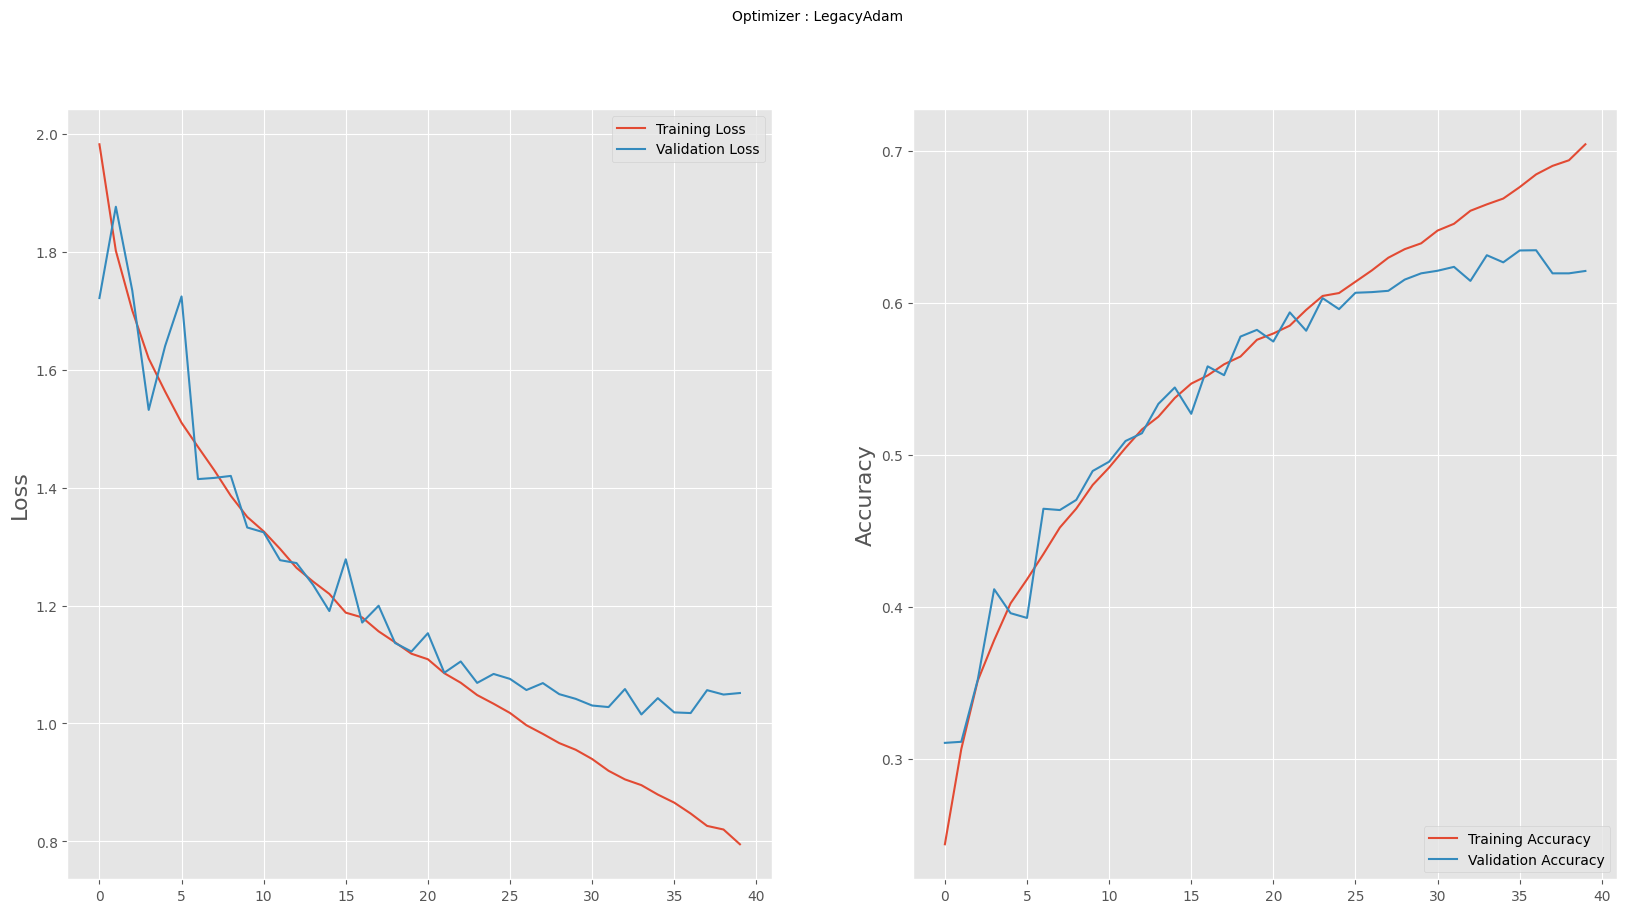

In [212]:
plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : LegacyAdam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


